# Conhecendo as Funções de Ativação

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

## Apresentação

No contexto das redes neurais artificiais, as funções de ativação representam as transformações aplicadas às entradas do neurônio sujeitas aos respectivos graus de contribuição (pesos) para decidir se este neurônio deve ou não disparar. Ao considerar as redes neurais feedforward multilayer perceptron, tais funções de ativação devem ser contínuas e deriváveis, sendo responsáveis por realizarem transformações não-lineares sucessivas da informação fornecida na camada de entrada até a camada de saída, fazendo com que o problema vá tornando-se linearmente separável à medida que adentra-se na rede.

Neste notebook, o seu objetivo é conhecer melhor as funções de ativação disponíveis na literatura e suas respectivas derivadas. Você irá construir gráficos que ilustrem tais funções.

## Requisitos

- Utilizar numpy
- Plotar com matplotlib

In [399]:
#Benjamin Borges e Jackson Gomes
# Célula reservada para importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

## Intervalo de Entrada

- Todas as funções devem ser ilustradas no intervalo [-4,+4] com amostras intervaladas em 0.1 no eixo x
- Consulte a documentação de numpy.arange sobre como fazê-lo
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
- Quantas amostras há em tal espaço de entrada?
- Qual o tipo deste dado?
- Qual a forma do espaço de entrada?

In [400]:
arr = np.arange(-4,4,0.1)
print(len(arr))

80


In [401]:
print(type(arr))

<class 'numpy.ndarray'>


### Função de ativação sigmoide

$$f(x) = \frac{1}{1 + e^{-\beta \cdot x}}$$

- Implemente uma função em Python que retorne o valor da função sigmóide para uma dada entrada
- Nesta função, considere beta como parâmetro nomeado com valor igual a 1.0
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função sigmoide
- Em um mesmo gráfico, ilustre 3 valores distintos para $\beta$:
  - $\beta = 0.7$ na cor laranja
  - $\beta = 0.5$ na cor verde
  - $\beta = 0.3$ na cor vermelha
  - Use legendas no gráfico

In [402]:
#Função sigmoide
sigmoide = lambda x: 1 / (1 + np.exp(-x))

In [403]:
#Calculando sigmode entradas
x=[]
for i in arr:
    x.append(sigmoide(np.add(i,1)))

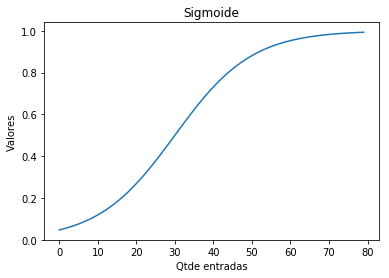

In [404]:
rarr = arr
harr = arr
larr = arr
garr = arr
arr = np.array(x)
#Plotando gráfico da função sigmóide, com valores de arr
plt.title("Sigmoide")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(arr)
plt.show()

In [405]:
#Função derivada da sigmóide
dsigmoide = lambda y: y*(1.0-y)

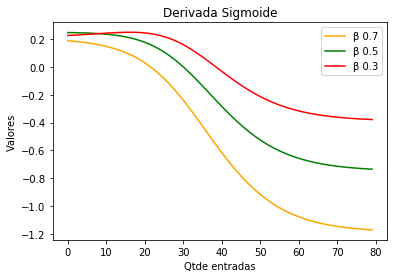

In [406]:
#0.7
x=[]
for i in arr:
    x.append(dsigmoide(np.add(i,0.7)))
x = np.array(x)
y=[]
for i in arr:
    y.append(dsigmoide(np.add(i,0.5)))
y = np.array(y)
z=[]
for i in arr:
    z.append(dsigmoide(np.add(i,0.3)))
z = np.array(z)

#Plotando gráfico da derivada da função sigmóide, com valores de arr
plt.title("Derivada Sigmoide")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(x, 'orange', label = 'β 0.7')
plt.plot(y, 'green', label = 'β 0.5')
plt.plot(z, 'red', label = 'β 0.3')
plt.legend()
plt.show()

### Função de Ativação ReLU (Unidade Linear Retificada)

$$f(x) = max(0,x)$$

- Implemente uma função em Python que retorne o valor da função ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função ReLU

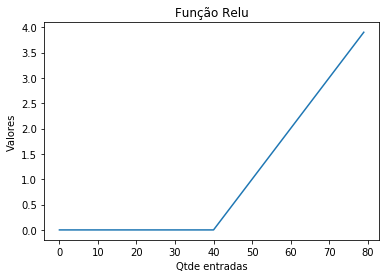

In [407]:
#Função ReLU
def relu(x):
    return np.maximum(0, x)
xrelu = relu(rarr)

#Plotando gráfico da função Relu, com valores de arr
plt.title("Função Relu")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(xrelu)
plt.show()

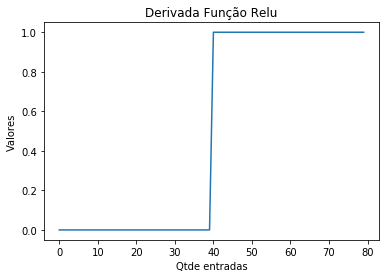

In [408]:
#Derivada função Relu
def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x
dxrelu = reluDerivative(xrelu)

#Plotando gráfico da derivada da função Relu, com valores de arr
plt.title("Derivada Função Relu")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(dxrelu)
plt.show()

### Função de ativação linear (purelin)

$$f(x) = x$$

- Implemente uma função em Python que retorne o valor da função linear para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão

### Função de ativação Tangente Hiperbólica

$$f(x) = tanh(x)$$

- Implemente uma função em Python que retorne o valor da função tangente hiperbólica para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão
- Utilize bibliotecas para auxiliar nesta tarefa
- Considere o intervalo (-1,1)

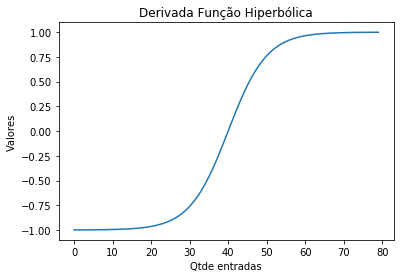

In [409]:
#Função Tangente Hiperbólica
def tanh(x, derivative=False):
    if derivative:
        return 1 - tanh(x) ** 2
    else:
        return 2*sigmoide(2*x) - 1

hip = tanh(harr)

#Plotando gráfico da função Hip, com valores de arr
plt.title("Derivada Função Hiperbólica")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(hip)
plt.show()

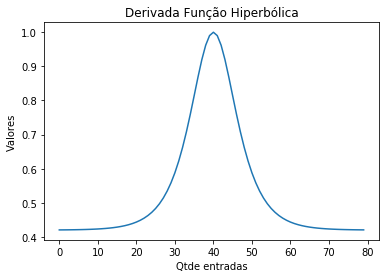

In [410]:
dhip = tanh(hip, derivative = True)

#Plotando gráfico da derivada da função Hip, com valores de arr
plt.title("Derivada Função Hiperbólica")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(dhip)
plt.show()

### Função de Ativação Gaussiana

$$f(x) = \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right)$$

- $\mu$ é o ponto médio (centro) da curva
- $\sigma$ denota o raio de abertura
- Implemente uma função em Python que retorne o valor da função gaussiana para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão


Considere também os seguintes valores ao plotar a função

- Parâmetros nomeados $\mu = 0$ e $\sigma = 1$
- $\mu = 0, \sigma = 0.3$
- $\mu = 0, \sigma = 0.5$
- $\mu = 0, \sigma = 0.7$
- $\mu = 0, \sigma = 0.9$
- $\mu = 0, \sigma = 1.1$

In [411]:
#Função Gaussiana
def gaussian(x,mu,sigma):
  return np.exp(-np.power((x - mu)/sigma, 2.)/2.)

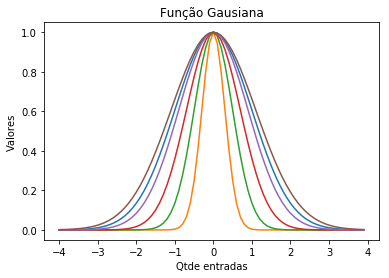

In [416]:
#gaus = gaussian(garr, 0, 0.3)
#Plotando gráfico da função Gaussiana, com valores de arr
plt.title("Função Gausiana")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
for mu, sig in [(0, 1), (0, 0.3), (0, 0.5), (0, 0.7), (0, 0.9), (0, 1.1)]:
    plt.plot(garr, gaussian(garr, mu, sig))
plt.show()

### Função de Ativação Leaky ReLU

$$f(x) = \left\{\begin{array}{cc} 0.01\cdot x & x < 0\\
x & x \geq 0
\end{array}
\right.$$

- Implemente uma função em Python que retorne o valor da função Leaky ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função Leaky ReLU

In [413]:
def Leaky_ReLU(x, alpha = 0.2, derivative=False):
    assert alpha < 1 and alpha > 0

    if derivative:
        less_than_zero = (np.zeros_like(x) >= x).astype(np.float32)
        less_than_zero *= alpha
        grt_than_zero = (np.zeros_like(x) < x).astype(np.float32)
        return less_than_zero + grt_than_zero

    else:
        return np.maximum(x*alpha, x)


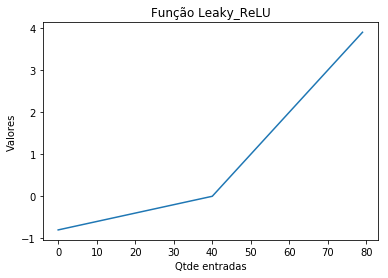

In [414]:
lrelu = Leaky_ReLU(larr)

#Plotando gráfico da função LeakyReLU, com valores de arr
plt.title("Função Leaky_ReLU")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(lrelu)
plt.show()

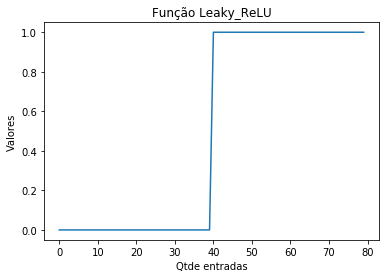

In [415]:
dlrelu = fReLU(larr, derivative=True)

#Plotando gráfico da derivada da função LeakyReLU, com valores de arr
plt.title("Função Leaky_ReLU")
plt.ylabel("Valores")
plt.xlabel("Qtde entradas")
plt.plot(dlrelu)
plt.show()